### Exercises

**Q3**: Tackle the Titanic dataset. A great place to start is on Kaggle.

**A3**: Kaggle solution developed [here](../../../kaggle/titanic/index.ipynb).

**Q4**: Build a spam classifier (a more challenging exercise):

Download examples of spam and ham from [Apache SpamAssassin’s public datasets](http://spamassassin.apache.org/old/publiccorpus/).

Unzip the datasets and familiarize yourself with the data format.

Split the datasets into a training set and a test set.

Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector indicating the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.

You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

Then try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.


**A4**: Solution below:

From the ReadME:

OK, now onto the corpus description.  It's split into three parts, as follows:

  - spam: 500 spam messages, all received from non-spam-trap sources.

  - easy_ham: 2500 non-spam messages.  These are typically quite easy to
    differentiate from spam, since they frequently do not contain any spammish
    signatures (like HTML etc).

  - hard_ham: 250 non-spam messages which are closer in many respects to
    typical spam: use of HTML, unusual HTML markup, coloured text,
    "spammish-sounding" phrases etc.

  - easy_ham_2: 1400 non-spam messages.  A more recent addition to the set.

  - spam_2: 1397 spam messages.  Again, more recent.


In [1]:
# let's download each of:
# - spam
# - spam_2
# - easy_ham
# - easy_ham_2
# - hard_ham


import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
LOCAL_DATA_DIR = './tmp/'

file_names = [
    '20030228_spam.tar.bz2',
    '20050311_spam_2.tar.bz2',
    '20030228_easy_ham.tar.bz2',
    '20030228_easy_ham_2.tar.bz2',
    '20030228_hard_ham.tar.bz2',
]

dirs = [
    'spam',
    'spam_2',
    'easy_ham',
    'easy_ham_2',
    'hard_ham',    
]

def fetch_file(file_name):
    download_path = LOCAL_DATA_DIR + file_name
    file_url = DOWNLOAD_ROOT + file_name
    if not (os.path.exists(download_path)):
        os.makedirs(LOCAL_DATA_DIR, exist_ok=True)
        tgz_path = os.path.join(LOCAL_DATA_DIR, file_name)
        urllib.request.urlretrieve(file_url, tgz_path)
        spam_tgz = tarfile.open(tgz_path)
        spam_tgz.extractall(path=LOCAL_DATA_DIR)
        spam_tgz.close()

for file_name in file_names:
    fetch_file(file_name)

At this point we've downloaded all the spam and ham into ./tmp.

It came in as zipfiles, and we extracted them all into their own subfolders (spam, spam_2, etc.)

Since they are all emails, we should use a library that can interpret the files and extract headers, etc.



In [2]:
file_name = LOCAL_DATA_DIR +'/easy_ham_2/' + '00001.1a31cc283af0060967a233d26548a6ce'
# file_name = LOCAL_DATA_DIR +'/spam_2/' + '00002.9438920e9a55591b18e60d1ed37d992b'

# Import the email modules we'll need
import email
from email.message import EmailMessage

# Open the plain text file whose name is in textfile for reading.
with open(file_name) as f:
    msg = email.message_from_file(f)

# msg is one of these: https://docs.python.org/3/library/email.message.html

In [3]:
# and see all the headers etc. like this:
msg.items()

[('Return-Path', '<exmh-workers-admin@spamassassin.taint.org>'),
 ('Delivered-To', 'yyyy@localhost.netnoteinc.com'),
 ('Received',
  'from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7106643C34\n\tfor <jm@localhost>; Wed, 21 Aug 2002 08:33:03 -0400 (EDT)'),
 ('Received',
  'from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Wed, 21 Aug 2002 13:33:03 +0100 (IST)'),
 ('Received',
  'from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LCXvZ24654 for\n    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 13:33:57 +0100'),
 ('Received',
  'from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by\n    listman.redhat.com (Postfix) with ESMTP id F12A13EA25; Wed, 21 Aug 2002\n    08:34:00 -0400 (EDT)'),
 ('Delivered-To', 'exmh-workers@listman.spamassassin.taint.org'),
 ('Received',
  'from int-mx1.

In [4]:
# It looks like one of the first things we should do is strip the html and generally clean up the text
# beautiful soup and the NLTK to the rescue! 
# beautiful soup: https://www.crummy.com/software/BeautifulSoup/
# NLTK: https://www.nltk.org/

In [5]:
payload = msg.get_payload()

from bs4 import BeautifulSoup
soup = BeautifulSoup(payload, 'html5lib')
raw_text = soup.get_text(strip=True)

In [6]:
# we can see that beautiful soup has done a pretty good job of stripping out all the html, 
# but there's still noise in the text
print(raw_text)

Date:        Tue, 20 Aug 2002 17:27:47 -0500
    From:        Chris GarriguesMessage-ID:  <1029882468.3116.TMDA@deepeddy.vircio.com>


  | I'm hoping that all people with no additional sequences will notice are
  | purely cosmetic changes.

Well, first, when exmh (the latest one with your changes) starts, I get...

can't read "flist(totalcount,unseen)": no such element in array
    while executing
"if {$flist(totalcount,$mhProfile(unseen-sequence)) > 0} {
	FlagInner spool iconspool labelup
    } else {
	FlagInner down icondown labeldown
    }"
    (procedure "Flag_MsgSeen" line 3)
    invoked from within
"Flag_MsgSeen"
    (procedure "MsgSeen" line 8)
    invoked from within
"MsgSeen $msgid"
    (procedure "MsgShow" line 12)
    invoked from within
"MsgShow $msgid"
    (procedure "MsgChange" line 17)
    invoked from within
"MsgChange 4862 show"
    invoked from within
"time [list MsgChange $msgid $show"
    (procedure "Msg_Change" line 3)
    invoked from within
"Msg_Change $msg(id) $

In [7]:
from nltk.stem.porter import PorterStemmer
import nltk

tokens = nltk.word_tokenize(raw_text)

# lower case
tokens = [w.lower() for w in tokens]
# strip non alphabetical tokens
tokens = [w for w in tokens if w.isalpha()]
# remove stopwords
from nltk.corpus import stopwords
tokens = [w for w in tokens if not w in stopwords.words('english')]

# stem the tokens to remove plurals etc.
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
# this looks like a pretty good start for a clean set of words from an email
print(stemmed[:100])

['date', 'tue', 'aug', 'chri', 'hope', 'peopl', 'addit', 'sequenc', 'notic', 'pure', 'cosmet', 'chang', 'well', 'first', 'exmh', 'latest', 'one', 'chang', 'start', 'get', 'ca', 'read', 'flist', 'totalcount', 'unseen', 'element', 'array', 'execut', 'flist', 'totalcount', 'mhprofil', 'flaginn', 'spool', 'iconspool', 'labelup', 'els', 'flaginn', 'icondown', 'labeldown', 'procedur', 'line', 'invok', 'within', 'procedur', 'msgseen', 'line', 'invok', 'within', 'msgseen', 'msgid', 'procedur', 'msgshow', 'line', 'invok', 'within', 'msgshow', 'msgid', 'procedur', 'msgchang', 'line', 'invok', 'within', 'msgchang', 'show', 'invok', 'within', 'time', 'list', 'msgchang', 'msgid', 'show', 'procedur', 'line', 'invok', 'within', 'msg', 'id', 'show', 'procedur', 'line', 'invok', 'within', 'cur', 'eval', 'bodi', 'line', 'invok', 'within', 'eval', 'msgshowproc', 'procedur', 'folderchang', 'line', 'invok', 'within', 'folderchang', 'inbox', 'cur', 'invok', 'within']


At this point we have a reasonably good technique to take an email and extract the content from it. We can try to build a pipeline to process all the emails.

In [8]:
# first we need to get the list of all possible words from all emails
# lets start by listing all emails
import os

spam_dirs = [ 'spam', 'spam_2']
ham_dirs = [ 'easy_ham', 'easy_ham_2', 'hard_ham']

# let's see first 5 files in the first spam dir
for file in os.listdir(LOCAL_DATA_DIR + '/' + spam_dirs[0])[:5]:
    print(file)

00249.5f45607c1bffe89f60ba1ec9f878039a
00373.ebe8670ac56b04125c25100a36ab0510
00214.1367039e50dc6b7adb0f2aa8aba83216
00210.050ffd105bd4e006771ee63cabc59978
00033.9babb58d9298daa2963d4f514193d7d6


In [9]:
def flatten(lists):
    return [j for i in lists for j in i]

In [10]:
def email_to_text(email):
    raw_text = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            raw_text = part.get_content()
        except: # in case of encoding issues
            raw_text = str(part.get_payload())

    
    return raw_text if raw_text is not None else ""

In [11]:
import email
import email.policy

def load_email(directory):
    emails = []
    for filename in os.listdir(LOCAL_DATA_DIR + '/' + directory):
        with open(os.path.join(LOCAL_DATA_DIR, directory, filename), "rb") as f:
            parsed_email = email.parser.BytesParser(policy=email.policy.default).parse(f)
            emails.append({
                'email': parsed_email,
                'text_content': email_to_text(parsed_email),
                'filename': filename,
                'directory': directory
            })
    return emails
    
ham_emails = flatten([load_email(directory) for directory in ham_dirs])
spam_emails = flatten([load_email(directory) for directory in spam_dirs])

In [12]:
print(len(spam_emails))
print(len(ham_emails))

1898
4153


In [13]:
# get all emails into dataframe
emails = []

import pandas as pd

spam_emails_df = pd.DataFrame.from_dict(spam_emails)
spam_emails_df['is_spam'] = True
ham_emails_df = pd.DataFrame.from_dict(ham_emails)
ham_emails_df['is_spam'] = False
all_emails_df = spam_emails_df.append(ham_emails_df)
all_emails_df = all_emails_df.reset_index(drop=True)

In [14]:
spam_emails_df.head()

,directory,email,filename,text_content,is_spam
0,spam,"[Return-Path, Delivered-To, Received, Received...",00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n \nInterest Rates are at thei...",True
1,spam,"[Return-Path, Delivered-To, Received, Received...",00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,True
2,spam,"[Return-Path, Delivered-To, Received, Received...",00214.1367039e50dc6b7adb0f2aa8aba83216,<html>\n<head>\n<title>We Dare You to Find a B...,True
3,spam,"[Return-Path, Delivered-To, Received, Received...",00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\nThe new domain names...,True
4,spam,"[Return-Path, Delivered-To, Received, Received...",00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,True


In [15]:
ham_emails_df.head()

,directory,email,filename,text_content,is_spam
0,easy_ham,"[Return-Path, Delivered-To, Received, Received...",00769.25bf9a767b5db0ed93f03c1637281663,"\nIn a message dated 9/24/2002 11:24:58 AM, ja...",False
1,easy_ham,"[Return-Path, Delivered-To, Received, Received...",01074.8590d61ac0aeeadb58dc2f2ba776c406,"Hiya, I always seem to get errors when I do an...",False
2,easy_ham,"[Return-Path, Delivered-To, Received, Received...",02479.14365bcad3a60fcf24c5c1813f6291fb,\nI don't know how one can expect better and m...,False
3,easy_ham,"[Return-Path, Delivery-Date, From, Date, Subje...",01417.ce7b07a2114218dbac682b599785820d,Tim Peters wrote:\n> I've run no experiments o...,False
4,easy_ham,"[Return-Path, Delivered-To, Received, Received...",00357.d559b71616f64ba1d1c1e61a03644fd4,"At 10:34 AM -0700 on 8/28/02, Jim Whitehead wr...",False


In [16]:
print(ham_emails_df.shape)
print(spam_emails_df.shape)
print(all_emails_df.shape)

(4153, 5)
(1898, 5)
(6051, 5)


In [17]:
all_emails_df.head()

,directory,email,filename,text_content,is_spam
0,spam,"[Return-Path, Delivered-To, Received, Received...",00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n \nInterest Rates are at thei...",True
1,spam,"[Return-Path, Delivered-To, Received, Received...",00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,True
2,spam,"[Return-Path, Delivered-To, Received, Received...",00214.1367039e50dc6b7adb0f2aa8aba83216,<html>\n<head>\n<title>We Dare You to Find a B...,True
3,spam,"[Return-Path, Delivered-To, Received, Received...",00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\nThe new domain names...,True
4,spam,"[Return-Path, Delivered-To, Received, Received...",00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,True


In [18]:
all_emails_df.tail()

,directory,email,filename,text_content,is_spam
6046,hard_ham,"[Return-Path, Received, Received, Message-ID, ...",00022.66e4bce429ab25c5d2c7e8a1a38838a0,<html>\n<head>\n<title>Tech Update Today</titl...,False
6047,hard_ham,"[Return-Path, Received, Received, Message-ID, ...",00100.78af3dc4c39277a6e1893f287cc2771f,<html>\n<head>\n<title>CNET Investor Dispatch<...,False
6048,hard_ham,"[Return-Path, Delivered-To, Received, Received...",00241.4e5262894127344225abfc680c35e3d3,>>From slashdot@slashdot.org Wed Nov 13 01:37:...,False
6049,hard_ham,"[Return-Path, Received, Received, Message-ID, ...",00110.77ac47048cafa2fe2587182f6d6b19d2,<html>\n<head>\n<title>Tech Update Today</titl...,False
6050,hard_ham,"[Return-Path, Received, Received, Message-ID, ...",00025.c27f4dd57c84c01305bd30bdee96810b,\n<html>\n<head>\n\t<title>CNET Shopper Newsle...,False


In [19]:
# we need to split the data into training/test. let's stratify based on the label
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(all_emails_df, all_emails_df["directory"]):
    # we're iterating over all splits, but because n_splits=1 we only have 1 really
    strat_train_set = all_emails_df.loc[train_index]
    strat_test_set = all_emails_df.loc[test_index]

In [20]:
print(strat_train_set.shape)
print(strat_test_set.shape)
# let's compare distribution of spam/ham across both sets

(4840, 5)
(1211, 5)


In [21]:
strat_train_set["directory"].value_counts() / len(strat_train_set)

easy_ham      0.413223
easy_ham_2    0.231612
spam_2        0.230785
spam          0.082851
hard_ham      0.041529
Name: directory, dtype: float64

In [22]:
strat_test_set["directory"].value_counts() / len(strat_test_set)

easy_ham      0.413708
spam_2        0.231214
easy_ham_2    0.231214
spam          0.082576
hard_ham      0.041288
Name: directory, dtype: float64

nearly identical distributions of spam and ham in the training/test sets. huzzah!

In [23]:
# lets make sure our training and test data looks reasonable
strat_train_set.head(10)

,directory,email,filename,text_content,is_spam
65,spam,"[Return-Path, Delivered-To, Received, Received...",00441.77768298934252b2fa200e7d9482993b,"<html>\n<body>\n<p align=""center""><a href=""htt...",True
5779,easy_ham_2,"[Return-Path, Delivered-To, Received, Received...",00272.d2daf940e50638774ca629aa11ab95a2,"Hi,\n\nMatthew French:\n> Declan Houlihan ment...",False
241,spam,"[Return-Path, Delivered-To, Received, Received...",00019.bbc97ad616ffd06e93ce0f821ca8c381,Lowest rates available for term life insurance...,True
2654,easy_ham,"[Return-Path, Delivered-To, Received, Received...",01763.33f1ae2bd826fe0fcee7fa711e6658a0,\nForwarded-by: Rob Windsor <windsor@warthog.c...,False
1515,spam_2,"[Return-Path, Delivered-To, Received, Received...",00905.8dcb590481d3e3c04d03506100c59497,\n\n<HTML>\n<HEAD>\n<TITLE>Cards In Advance</T...,True
5255,easy_ham_2,"[Return-Path, Delivered-To, Received, Received...",00417.baf263143d4cfd55e4586e56f1820cd5,"Hi guys,\n slightly OT. This comes from The ...",False
4256,easy_ham,"[Return-Path, Delivered-To, Received, Received...",00743.1ee0d64b26edd4ab988d5b848232f554,\nRare Virgin Shark Births Reported in Detroit...,False
760,spam_2,"[Return-Path, Delivery-Date, Received, Receive...",00535.6f0720362e104f169c08308d82a8c804,Fighting a Traffic Ticket? Going through a Di...,True
3091,easy_ham,"[Return-Path, Delivery-Date, From, Date, Subje...",01739.f57fcc3356b4c910af8ac2ce06d7301c,\n Guido> Why would we care about installin...,False
1080,spam_2,"[Return-Path, Delivered-To, Received, Received...",01176.36afa20e4f8dd2246da63c3b23129305,Below is the result of your feedback form. It...,True


In [24]:
strat_test_set.head(10)

,directory,email,filename,text_content,is_spam
4337,easy_ham,"[Return-Path, Delivered-To, Received, Received...",00116.22aef63fc606e0ad46b5593bc897469a,"So, I've been letting the little .exe of SETI@...",False
1455,spam_2,"[Return-Path, Delivery-Date, Received, Receive...",00620.488299bafd542cdfa1a1fb98f00e6441,\n============================================...,True
4527,easy_ham_2,"[Return-Path, Delivered-To, Received, Received...",00803.6fc0c081e3cda7194e3633ea90d146e5,"Someone says,\n\n> > Wow. I'm so tempted to ma...",False
840,spam_2,"[Return-Path, Delivered-To, Received, Received...",00236.a46588c69d43e80c618038b95eff2893,"Jane,\n\nHere is the information you requested...",True
3797,easy_ham,"[Return-Path, Delivered-To, Received, Received...",01195.a22a2504bafda16790a70217d253e770,Peter Peltonen (peter.peltonen@iki.fi) wrote*:...,False
577,spam_2,"[Return-Path, Delivery-Date, Received, Receive...",00605.8a2e83e442d0052a2b2e9cff1ef0793c,Your mortgage has been approved.\r\n\r\nNow ap...,True
1425,spam_2,"[Return-Path, Delivered-To, Received, Message-...",00133.7dbf2e71621f92eada31cc655ff12fd3,"\n<HTML>\n<BODY>\n<!DOCTYPE HTML PUBLIC ""-//W3...",True
4594,easy_ham_2,"[Return-Path, Delivered-To, Received, Received...",01232.8077cd29af0f1eb3a7c1b125375d9a9e,"On 14 Aug 2002 10:59:22 -0400, ""Thomas J. Bake...",False
3671,easy_ham,"[Return-Path, Delivered-To, Received, Received...",01770.0e2c720e2d4abac3f8734b9914186f21,use Perl Daily Headline Mailer\n\nTwo OSCON Li...,False
3446,easy_ham,"[Return-Path, Delivered-To, Received, Received...",00476.7133902476448f294ee064117d96c988,"On Fri, 6 Sep 2002, Jim Whitehead wrote:\n--]W...",False


It looks like our test and training sets have a near equal proportion of ham vs spam

In [25]:
train_x = strat_train_set['text_content'].values
train_y = strat_train_set['is_spam'].values
test_x = strat_test_set['text_content'].values
test_y = strat_test_set['is_spam'].values

Let's try using a simple pipeline similar to [this](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py), and then compare the results of that to one where we use nltk to analyze.

In [26]:
from __future__ import print_function

from pprint import pprint
from time import time
import logging
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
#     'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    #'clf__n_iter': (10, 50, 80),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(train_x, train_y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   45.6s finished


done in 54.580s

Best score: 0.981
Best parameters set:
	clf__alpha: 1e-06
	clf__penalty: 'l2'
	vect__ngram_range: (1, 2)


In [27]:
best_vanilla_estimator = grid_search.best_estimator_
test_y_predicted = best_vanilla_estimator.predict(test_x)
from sklearn.metrics import accuracy_score
# accuracy is the % of predicated values that match the expected targets
accuracy_score(test_y, test_y_predicted)

0.98761354252683731

In [28]:
# how many coefficients are there? Should be the same as the number of features.
coefs = best_vanilla_estimator.named_steps['clf'].coef_[0]
print(len(coefs))
vect = best_vanilla_estimator.named_steps['vect']
print(len(vect.get_feature_names()))

596418
596418


In [29]:
# what are the highest weights?
from numpy import argpartition
import numpy as np
ind = np.argpartition(coefs, -20)[-20:]
print(ind)
coefs[ind]

[128811 537808  80518  37903 123567 588057 484495 147505 365677 374114
  59319 129144 475594 415225 471657 352109  80509 543483 589381 398329]


array([ 10.08494394,  10.2371231 ,  10.3349859 ,  10.4683755 ,
        10.65025003,  15.15023533,  13.68164047,  16.11048099,
        10.97595015,  12.47185038,  10.58214426,  11.20330711,
        10.61596512,  11.54463401,  13.54304387,  12.74263544,
        12.38372415,  17.91415574,  17.53687255,  15.88368209])

In [30]:
print(np.array(vect.get_feature_names())[np.array(ind)])

['br' 'trafficmagnet' 'align center' '31 30' 'black' 'you'
 'spamassassin sightings' 'center' 'nbsp font' 'nok' '8226' 'br br'
 'size nbsp' 'please' 'sightings' 'money' 'align'
 'ukqdrblkougooeoffnxsmbowei' 'your' 'our']


In [31]:
#how about worst correlations (indicating not spam?)
ind = np.argpartition(coefs, 20)[:20]
print(ind)
print(coefs[ind])
print(np.array(vect.get_feature_names())[np.array(ind)])

[471504 268692 329993 436125 156634  28830 353105 236920 395578 580867
 510848 153829 353111 539696 195344 387720  42566  69578  17057 160534]
[-10.48464947 -12.39504365 -11.87534233 -10.71941647 -10.50774475
 -14.43903122 -11.67181367 -10.25184401 -10.53168789 -12.00715695
 -19.96266592 -14.31803423 -12.22705184 -11.38437954 -15.34408399
 -10.24395113  -9.86275979  -9.91428174  -9.85856523  -9.73967341]
['sie' 'height td' 'lockergnome' 'razor' 'cnet' '2002' 'moo' 'fool' 'org'
 'wrote' 'the' 'class' 'moo moo' 'tripwire' 'div font' 'on' '3t' 'about'
 '0px 0px' 'com gif']


It looks like some of the most important features to the model are html, and the 'spamassassins sightings' string, which probably wouldn't actually be in real spam. 

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_predicted)

array([[823,   8],
       [  7, 373]])

In [33]:
pd.crosstab(test_y, test_y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,823,8,831
True,7,373,380
All,830,381,1211


In [34]:
# let's check 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print(precision_score(test_y, test_y_predicted))
print(recall_score(test_y, test_y_predicted))
print(f1_score(test_y, test_y_predicted))

0.979002624672
0.981578947368
0.980289093298


97% using the built in countvectorizer with no real pre-processing and an sgd predictor. Pretty good! 

In [35]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(best_vanilla_estimator, test_x, test_y, cv=3,
                             method="decision_function")

Precision: The accuracy of the positive predictions. Recall: The ratio of positive predictions detected by the classifier, aka 'sensitivity' or 'true positive rate' (TPR).

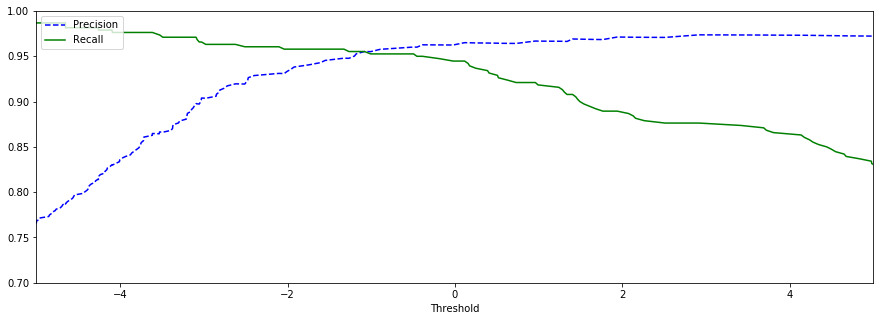

In [36]:
# the TRUE case is for spam. 
# so true positive is we've correctly identified spam
# true negative is we've correctly identified ham 
# false positive is we've misidentified ham as spam (this maybe worst, as emails go missing) (Type 1 Error)
# false negative is we've misidentified spam as ham (Type 2 Error)


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(15, 5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0.7, 1])
    plt.xlim([-5, 5])
    

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

if we jacked up the threshold, we would lower recall (not identify as much spam), but the precision would increase (almost all spam classifications would be correct).
if we lowered threshold, recall would increase, and we'd identify more spam, but precision would suffer, meaning we're identifying a lot of ham as spam.

let's plot recall against precision

<Figure size 576x432 with 0 Axes>

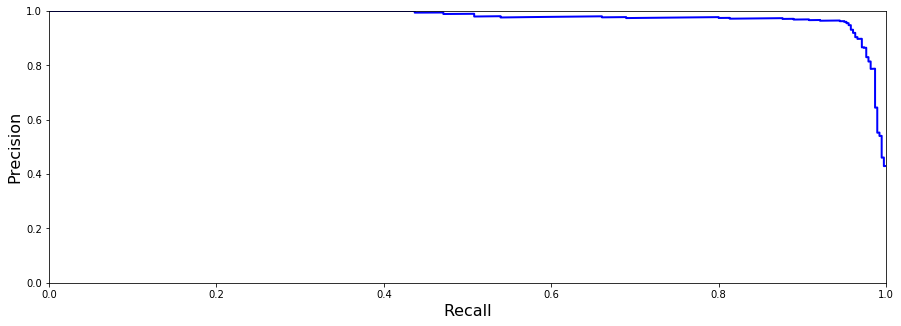

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(15, 5))
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0.0, 1, 0.0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

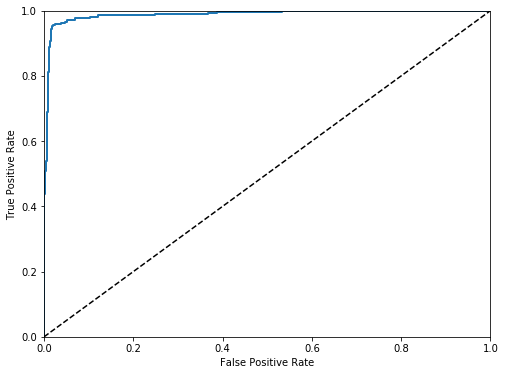

In [38]:
from sklearn.metrics import roc_curve
# https://en.wikipedia.org/wiki/Receiver_operating_characteristic

fpr, tpr, thresholds = roc_curve(test_y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, y_scores)

0.98809614288428649

this is a pretty amazing score already, seems hard to improve..
from wikipedia: 
> The true-positive rate is also known as sensitivity, recall or probability of detection[1] in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm[1] and can be calculated as (1 − specificity). 

let's see if we can improve with our own text processing

In [40]:
from nltk.corpus import stopwords
    
    
def email_soup_preprocessor(text):
    try:
        soup = BeautifulSoup(text,'html5lib')
        return soup.get_text(strip=True)
    except:
        return ""
        
def nltk_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    tokens = [w.lower() for w in tokens]
    # strip non alphabetical tokens
    tokens = [w for w in tokens if w.isalpha()]
    # remove stopwords
    tokens = [w for w in tokens if not w in stopwords.words('english')]

    # stem the tokens to remove plurals etc.
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    return stemmed

In [41]:
cv = CountVectorizer(tokenizer=nltk_tokenizer, preprocessor=email_soup_preprocessor, ngram_range=(1, 2))

In [42]:
# doing CV step out of the pipeline as it takes forever to transform everything using nltk and beautifulsoup
cv_transformed = cv.fit_transform(train_x)

/opt/conda/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5.asp



" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [43]:
tfidf = TfidfTransformer()
tfidf_transformed = tfidf.fit_transform(cv_transformed)

In [44]:
pipeline = Pipeline([
#     ('vect', cv),
#     ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    #'clf__n_iter': (10, 50, 80),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(tfidf_transformed, train_y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['clf']
parameters:
{'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished


done in 0.962s

Best score: 0.975
Best parameters set:
	clf__alpha: 1e-05
	clf__penalty: 'elasticnet'


In [45]:
best_soup_estimator = grid_search.best_estimator_

test_x_transformed = cv.transform(test_x)
test_x_transformed = tfidf.transform(test_x_transformed)

test_y_predicted = best_soup_estimator.predict(test_x_transformed)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [46]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(best_soup_estimator, test_x_transformed, test_y, cv=3,
                             method="decision_function")

In [47]:
print(accuracy_score(test_y, test_y_predicted))
print(precision_score(test_y, test_y_predicted))
print(recall_score(test_y, test_y_predicted))
print(f1_score(test_y, test_y_predicted))
print(roc_auc_score(test_y, y_scores))

0.985962014864
0.984
0.971052631579
0.977483443709
0.986693267465


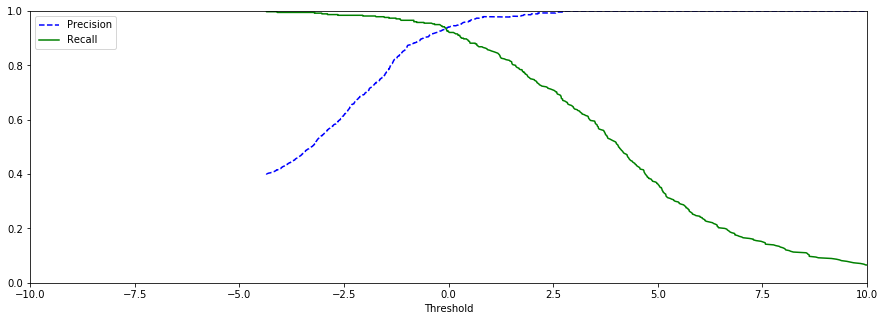

In [48]:
# the TRUE case is for spam. 
# so true positive is we've correctly identified spam
# false positive is we've misidentified ham as spam (this maybe worst, as emails go missing)
# false negative is we've correctly identified ham 
# true negative is we've misidentified spam as ham

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(15, 5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.xlim([-10, 10])
    

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [49]:
# what are the highest weights?
coefs = best_soup_estimator.named_steps['clf'].coef_[0]
print(len(coefs))
vect = cv
print(len(vect.get_feature_names()))

from numpy import argpartition
import numpy as np
ind = np.argpartition(coefs, -30)[-30:]
print(ind)
coefs[ind]

print(np.array(vect.get_feature_names())[np.array(ind)])

375338
375338
[223380 164799 358663 137435 143708 219932 204975  99056 212468  96907
 346709 266504 255174 342498 126207 299658 196151 123336 227957  24838
  40244 149935  71010 271502 207236 228819  54052  77402 244267  77401]
['offer' 'invest' 'webcam' 'guarante' 'hereto' 'norton' 'minut' 'enenkio'
 'name' 'email' 'us' 'receiv' 'program' 'ukqdrblkougooeoffnxsmbowei' 'fund'
 'site' 'market' 'free' 'opportun' 'awesom' 'busi' 'http irish' 'credit'
 'remov' 'money' 'order' 'click' 'deathtospamdeathtospamdeathtospam email'
 'pleas' 'deathtospamdeathtospamdeathtospam']


these seem a little more reasonable than the vanilla version, but still include some things that probably aren't indicitive of spam generally, such as 'http irish', which is just a common footer. 

let's try including details about if it is html or not to the data and see if we can use that to help increase the score

In [50]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()
    
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures    

In [51]:
structures_counter(list(x['email'] for x in ham_emails)).most_common()

[('text/plain', 3835),
 ('text/html', 120),
 ('multipart(text/plain, application/pgp-signature)', 101),
 ('multipart(text/plain, text/html)', 63),
 ('multipart(text/plain, text/plain)', 5),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  2),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, multipart(text/plain))', 2),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 2),
 ('multipart(text/plain, application/x-pkcs7-signature)', 2),
 ('multipart(text/html)', 2),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, text/plain, text/plain)'

In [52]:
structures_counter(list(x['email'] for x in spam_emails)).most_common()

[('text/plain', 817),
 ('text/html', 772),
 ('multipart(text/plain, text/html)', 159),
 ('multipart(text/html)', 49),
 ('multipart(text/plain)', 44),
 ('multipart(multipart(text/html))', 23),
 ('multipart(multipart(text/plain, text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/plain, application/octet-stream)', 3),
 ('multipart(text/html, text/plain)', 3),
 ('multipart(text/plain, application/octet-stream, text/plain)', 3),
 ('multipart/alternative', 2),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/html, image/jpeg)', 2),
 ('multipart(multipart(text/plain), application/octet-stream)', 2),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('text/plain charset=us-ascii', 1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/jpeg)',
  1),
 ('multipart(text/plain, multipart(text/plain))', 1)

for looking at content-type, let's just check for presence of 3 attributes: 'text/plain', 'text/html', and 'pgp'

We've already got the VectorCounter from earlier, let's just reuse that and add a new estimator to add these 3 columns

In [53]:
content_types = strat_train_set['email'].apply(lambda email: get_email_structure(email))
is_plain_text = content_types.apply(lambda content_type: float('text/plain' == content_type))
is_html = content_types.apply(lambda content_type: float('text/html' in content_type))
is_pgp = content_types.apply(lambda content_type: float('pgp' in content_type))

In [54]:
tfidf_transformed

<4840x375338 sparse matrix of type '<class 'numpy.float64'>'
	with 1045007 stored elements in Compressed Sparse Row format>

In [55]:
from scipy.sparse import hstack

stacked_train_x = hstack( (tfidf_transformed, np.array(is_plain_text.values)[:,None]) )
stacked_train_x = hstack( (stacked_train_x, np.array(is_html.values)[:,None]) )
stacked_train_x = hstack( (stacked_train_x, np.array(is_pgp.values)[:,None]) )

In [56]:
stacked_train_x

<4840x375341 sparse matrix of type '<class 'numpy.float64'>'
	with 1049783 stored elements in COOrdinate format>

In [64]:
pipeline = Pipeline([
#     ('vect', cv),
#     ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
#     'clf__n_iter': (10, 50, 80),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(stacked_train_x, train_y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['clf']
parameters:
{'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
done in 0.881s

Best score: 0.969
Best parameters set:
	clf__alpha: 1e-05
	clf__penalty: 'elasticnet'


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished


In [65]:
best_content_type_estimator = grid_search.best_estimator_
coefs = best_content_type_estimator.named_steps['clf'].coef_[0]
print(len(coefs))


from numpy import argpartition
import numpy as np
ind = np.argpartition(coefs, -30)[-30:]
print(ind)
print(np.array(vect.get_feature_names())[np.array(ind)])
coefs[ind]

375341
[208895 357296 149829 354008 299160 186818 263410 358912  77248 255174
 316188  54201 126207 227957 207236 244267  71010 212468 228819 123336
  77401 137435 346709 164799 266504 272316  40244  77402 271502  54052]
['mortgag' 'watchdog' 'http http' 'visit' 'sincer' 'loan' 'rate' 'websit'
 'dear' 'program' 'stylu' 'click link' 'fund' 'opportun' 'money' 'pleas'
 'credit' 'name' 'order' 'free' 'deathtospamdeathtospamdeathtospam'
 'guarante' 'us' 'invest' 'receiv' 'repli' 'busi'
 'deathtospamdeathtospamdeathtospam email' 'remov' 'click']


array([  4.63126016,   4.74083965,   4.74554917,   4.88706934,
         4.93608062,   5.11625862,   4.94306913,   5.14986848,
         5.37802571,   5.17376873,   5.62233817,   5.16043376,
         5.68898829,   7.22637402,   9.94221591,  13.29232587,
         9.35860783,   7.21908696,   6.11740549,  12.21404171,
         5.93149548,   6.56617409,   7.6967615 ,   6.0577948 ,
         6.09542333,   5.70473072,   7.37544924,   5.93149548,
        15.38454416,  10.81633864])

In [66]:
#how about worst correlations (indicating not spam?)
ind = np.argpartition(coefs, 20)[:20]
print(ind)
coefs[ind]

[281952 362878 201568 346647 346617 347622 280704 369264 324743 149203
  56876  83814 306527 203063 292312 284097  75211  55420 215690 114673]


array([ -6.52795276,  -5.18948628,  -5.86716064,  -5.89946963,
        -5.61684725,  -5.72183816,  -5.31268501,  -7.69981558,
        -5.11849366,  -5.91926085,  -4.31874935,  -4.21572899,
        -6.17119969,  -4.26585044,  -4.8499167 ,  -4.87653053,
        -5.49155548, -10.68062546,  -5.64064678,  -6.22541997])

the last 3 coefficients were is_plaintext, is_html, and is_pgp. It looks like plaintext/pgp are strong indicators against it being spam, and html content type coefficient is near 0, meaning it doesn't indicate much.

In [67]:
coefs[-3:]

array([-3.86881979,  0.09292222, -4.16554621])

In [68]:
content_types_test = strat_test_set['email'].apply(lambda email: get_email_structure(email))
is_plain_text_test = content_types_test.apply(lambda content_type: float('text/plain' == content_type))
is_html_test = content_types_test.apply(lambda content_type: float('text/html' == content_type))
is_pgp_test = content_types_test.apply(lambda content_type: float('pgp' in content_type))

In [69]:
stacked_test_x = hstack( (test_x_transformed, np.array(is_plain_text_test.values)[:,None]) )
stacked_test_x = hstack( (stacked_test_x, np.array(is_html_test.values)[:,None]) )
stacked_test_x = hstack( (stacked_test_x, np.array(is_pgp_test.values)[:,None]) )

test_y_predicted = best_content_type_estimator.predict(stacked_test_x)
from sklearn.metrics import accuracy_score

In [70]:
# let's check 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

y_scores = cross_val_predict(best_content_type_estimator, stacked_test_x, test_y, cv=3,
                             method="decision_function")

print(accuracy_score(test_y, test_y_predicted))
print(precision_score(test_y, test_y_predicted))
print(recall_score(test_y, test_y_predicted))
print(f1_score(test_y, test_y_predicted))
print(roc_auc_score(test_y, y_scores))

0.986787778695
0.986631016043
0.971052631579
0.978779840849
0.986870606118


previous results are slightly worse. we gained just a little bit it seems..

0.985962014864

0.984

0.971052631579

0.977483443709

0.986693267465

todo:
- would be nice to clean up the analysis of results into a common function. 
- clean up processing into union pipeline in last scenario. apparently latest sklearn pipeline has caching which could make countvectorizer much faster to repeatedly transform.